In [1]:
from src.model import CNN
from src.train import train_model
from src.load_data import load_and_preprocess_data, prepare_train_test_data
from src.evaluate import evaluate_model

c:\Users\asman\anaconda3\envs\myenv\lib\site-packages\requests\__init__.py:104: RequestsDependencyWarning: urllib3 (1.26.18) or chardet (5.0.0)/charset_normalizer (2.0.12) doesn't match a supported version!
  RequestsDependencyWarning)


In [2]:
import tensorflow as tf
tf.config.list_physical_devices('GPU')

[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]

In [3]:
model = CNN(input_shape=(100, 100, 3), num_classes=5)
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 98, 98, 16)        448       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 49, 49, 16)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 48, 48, 32)        2080      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 24, 24, 32)        0         
_________________________________________________________________
separable_conv2d (SeparableC (None, 24, 24, 64)        2400      
_________________________________________________________________
separable_conv2d_1 (Separabl (None, 24, 24, 64)        4736      
_________________________________________________________________
batch_normalization (BatchNo (None, 24, 24, 64)        2

In [4]:
model.compile_model()

In [ ]:
base_path = 'Database'
dataset_folder = 'train'  
image_size = 100  
image_data, label_data, label_names = load_and_preprocess_data(base_path, dataset_folder, image_size=image_size)

Loading MCI: 100%|██████████| 8002/8002 [00:12<00:00, 641.12it/s]


In [6]:
image_data.shape

(40077, 100, 100, 3)

In [7]:
test_size = 0.2  # 20% of data will be used for testing
random_state = 42 
X_train, X_test, Y_train, Y_test, label_names = prepare_train_test_data(image_data, label_data, test_size=test_size, random_state=random_state)

In [9]:
#from keras import backend as K
#K.clear_session()

In [10]:
#import tensorflow as tf

In [11]:
#tf.config.list_physical_devices('GPU')

In [8]:
model_name = 'cnn'
history = train_model(model,X_train, Y_train, X_test, Y_test,model_name)

Epoch 1/50
3207/3207 [==============================] - 65s 17ms/step - loss: 1.1891 - auc: 0.8195 - val_loss: 0.8191 - val_auc: 0.9141
Epoch 2/50
3207/3207 [==============================] - 55s 17ms/step - loss: 0.7389 - auc: 0.9293 - val_loss: 0.4843 - val_auc: 0.9689
Epoch 3/50
3207/3207 [==============================] - 56s 17ms/step - loss: 0.5310 - auc: 0.9624 - val_loss: 0.3172 - val_auc: 0.9864
Epoch 4/50
3207/3207 [==============================] - 56s 18ms/step - loss: 0.4225 - auc: 0.9750 - val_loss: 0.2481 - val_auc: 0.9910
Epoch 5/50
3207/3207 [==============================] - 55s 17ms/step - loss: 0.3677 - auc: 0.9803 - val_loss: 0.2497 - val_auc: 0.9910
Epoch 6/50
3207/3207 [==============================] - 56s 17ms/step - loss: 0.3309 - auc: 0.9835 - val_loss: 0.1802 - val_auc: 0.9955
Epoch 7/50
3207/3207 [==============================] - 60s 19ms/step - loss: 0.2831 - auc: 0.9873 - val_loss: 0.1563 - val_auc: 0.9965
Epoch 8/50
3207/3207 [==========================

In [11]:
loss, accuracy = model.evaluate(X_test, Y_test)
print("Test Loss: ", loss)
print("Test Accuracy: ", accuracy)

251/251 [==============================] - 1s 4ms/step - loss: 0.0638 - auc: 0.9980
Test Loss:  0.0638086125254631
Test Accuracy:  0.9980165958404541


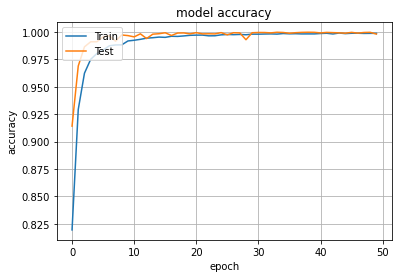

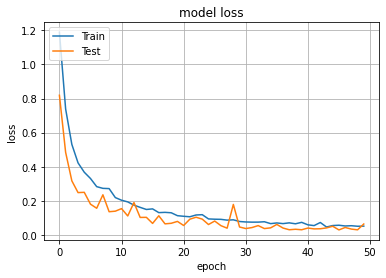

In [12]:
import matplotlib.pyplot as plt

# summarize history for accuracy
plt.plot(history.history['auc'])
plt.plot(history.history['val_auc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.grid()
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.grid()
plt.show()


              precision    recall  f1-score   support

           0       0.98      0.98      0.98      1653
           1       0.98      1.00      0.99      1612
           2       1.00      0.96      0.98      1588
           3       0.96      1.00      0.98      1552
           4       0.99      0.97      0.98      1611

    accuracy                           0.98      8016
   macro avg       0.98      0.98      0.98      8016
weighted avg       0.98      0.98      0.98      8016



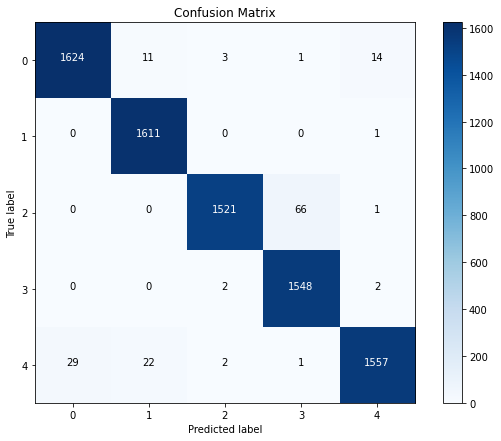

In [13]:
evaluate_model(model, X_test, Y_test)